In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img=image.load_img(r'/Users/sainandaviharim/Downloads/CNN/training/happy/3.jpeg')

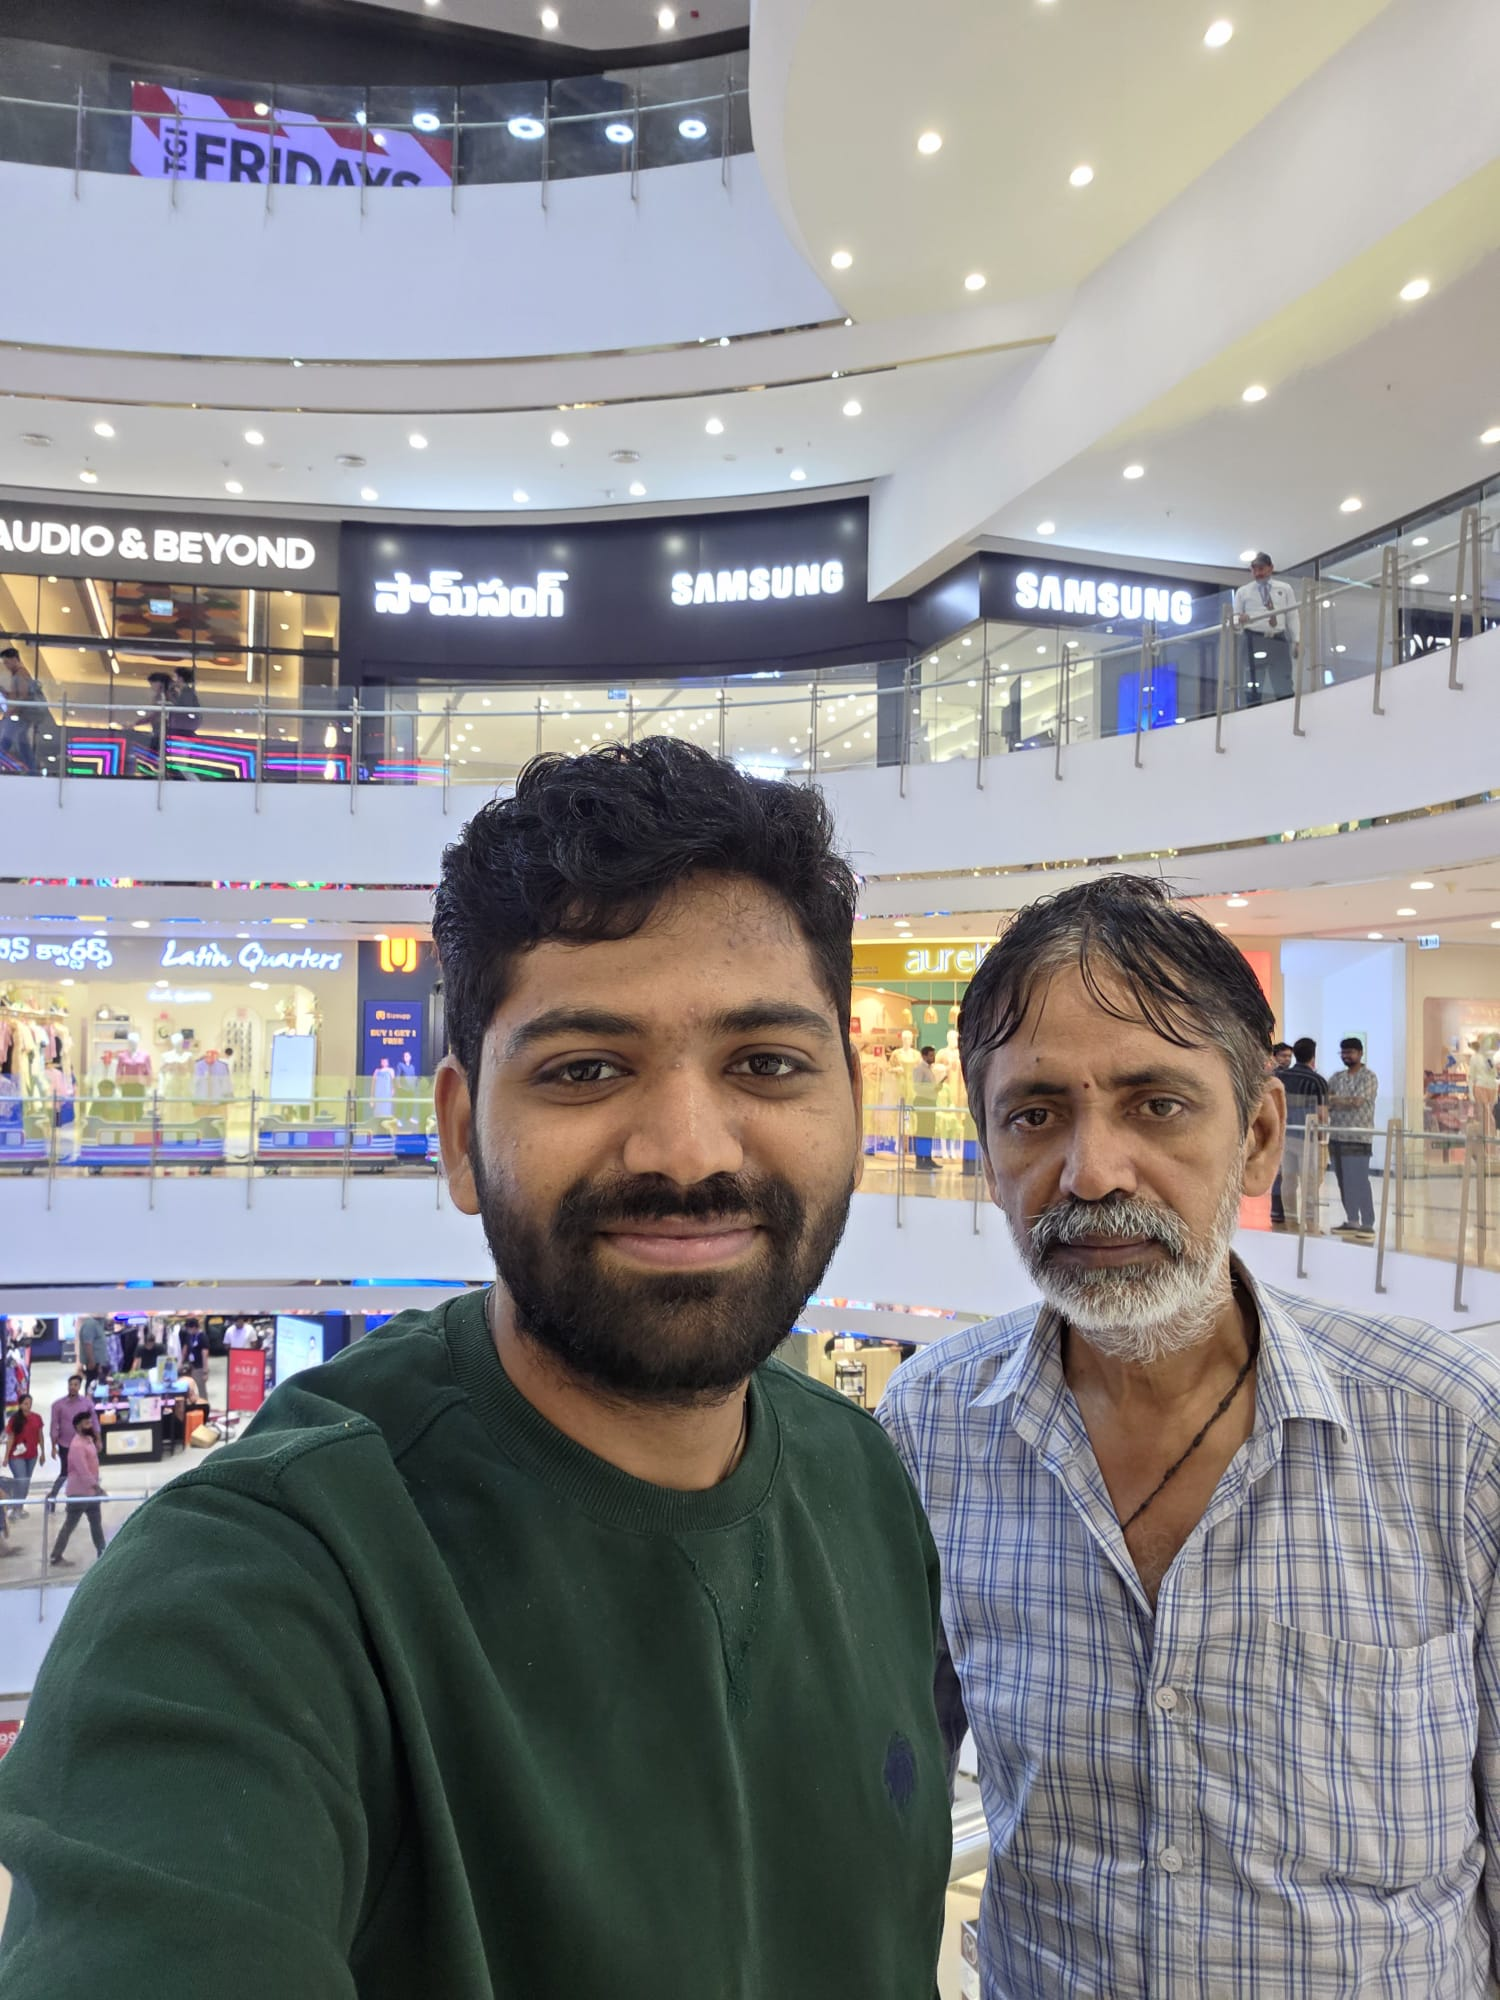

In [3]:
img


In [4]:
i1=cv2.imread(r'/Users/sainandaviharim/Downloads/CNN/training/happy/3.jpeg')

In [5]:
i1

array([[[ 54,  49,  50],
        [ 52,  47,  48],
        [ 50,  45,  46],
        ...,
        [195, 199, 204],
        [195, 199, 204],
        [195, 199, 204]],

       [[ 54,  49,  50],
        [ 52,  47,  48],
        [ 50,  45,  46],
        ...,
        [195, 199, 204],
        [195, 199, 204],
        [195, 199, 204]],

       [[ 54,  49,  50],
        [ 52,  47,  48],
        [ 50,  45,  46],
        ...,
        [195, 199, 204],
        [195, 199, 204],
        [195, 199, 204]],

       ...,

       [[ 90,  94,  69],
        [ 93,  97,  72],
        [ 95,  99,  74],
        ...,
        [ 83,  95,  99],
        [ 73,  87,  93],
        [ 62,  76,  82]],

       [[ 93,  97,  72],
        [ 92,  96,  71],
        [ 93,  97,  72],
        ...,
        [ 81,  93,  97],
        [ 72,  86,  92],
        [ 62,  76,  82]],

       [[ 92,  96,  71],
        [ 90,  94,  69],
        [ 89,  93,  68],
        ...,
        [ 82,  94,  98],
        [ 74,  88,  94],
        [ 63,  77,  83]]

In [7]:
i1.shape

(2000, 1500, 3)

In [8]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [9]:
train_dataset=train.flow_from_directory(r'/Users/sainandaviharim/Downloads/CNN/training',
                                       target_size=(200,200),
                                       batch_size=32,
                                       class_mode='binary')

Found 14 images belonging to 2 classes.


In [10]:
validation_dataset=train.flow_from_directory(r'/Users/sainandaviharim/Downloads/CNN/validation',
                                       target_size=(200,200),
                                       batch_size=32,
                                       class_mode='binary')

Found 0 images belonging to 2 classes.


In [11]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [12]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
validation_dataset.classes

array([], dtype=int32)

In [17]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2) ,
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2) ,
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2) ,

                                  tf.keras.layers.Flatten(),

                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [21]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(),
             metrics=['accuracy'])

In [29]:
model_fit=model.fit(train_dataset,
                   epochs=15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 1.0000 - loss: 0.3597
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 1.0000 - loss: 0.2827
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 1.0000 - loss: 0.2173
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.9286 - loss: 0.2102
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.4286 - loss: 0.8471
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.5714 - loss: 0.8052
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 1.0000 - loss: 0.3565
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 1.0000 - loss: 0.2245
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 1.0000 - loss: 0.1631
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 1.0000 - loss: 0.1152
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 1.0000 - loss: 0.0827
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 1.0000 - lo

In [30]:
test_path=r'/Users/sainandaviharim/Downloads/CNN/testing'

In [33]:
for i in os.listdir(test_path):
    print(i)

WhatsApp Image 2025-08-12 at 12.39.05 (2).jpeg
.DS_Store
WhatsApp Image 2025-08-12 at 12.40.19 (2).jpeg
WhatsApp Image 2025-08-12 at 12.39.05 (6).jpeg
WhatsApp Image 2025-08-12 at 12.40.19.jpeg
WhatsApp Image 2025-08-12 at 12.39.04.jpeg
WhatsApp Image 2025-08-12 at 12.39.05 (3).jpeg
WhatsApp Image 2025-08-12 at 12.40.19 (1).jpeg
WhatsApp Image 2025-08-12 at 12.40.18 (1).jpeg
WhatsApp Image 2025-08-12 at 12.39.05.jpeg
WhatsApp Image 2025-08-12 at 12.39.05 (5).jpeg
WhatsApp Image 2025-08-12 at 12.40.18.jpeg
WhatsApp Image 2025-08-12 at 12.39.04 (8).jpeg


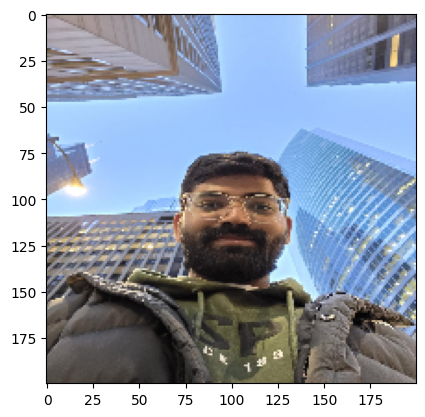

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
i am not happy


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x1421f52b0>

In [43]:
for i in os.listdir(test_path):
    img=image.load_img(test_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])

    val=model.predict(images)
    if(val==0):
        print('i am happy')
    if(val==1):
        print('i am not happy')
    

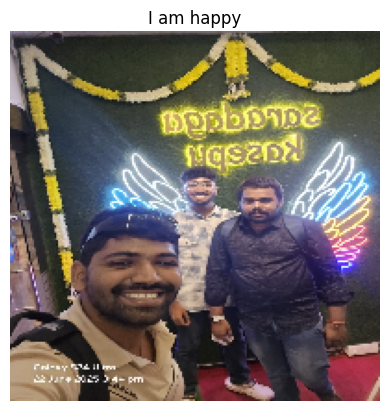

1.jpeg: I am happy


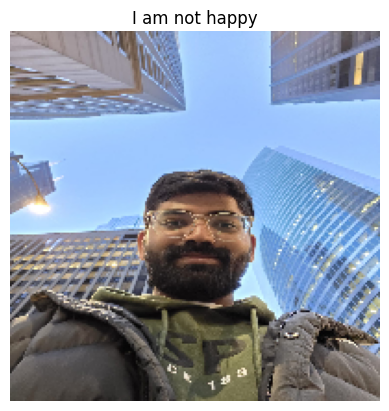

10.jpeg: I am not happy


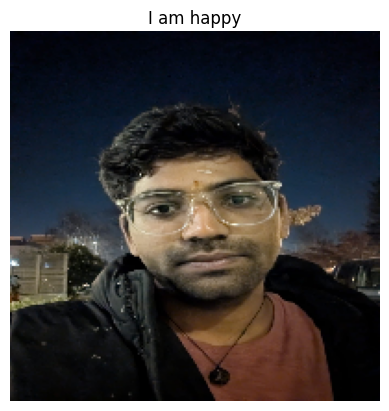

11.jpeg: I am happy


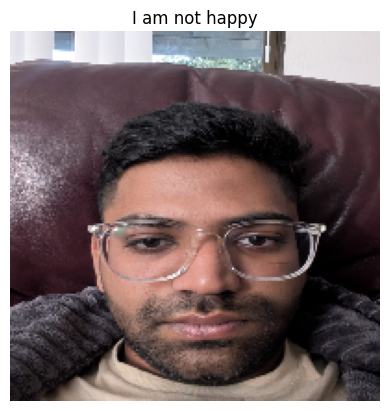

12.jpeg: I am not happy


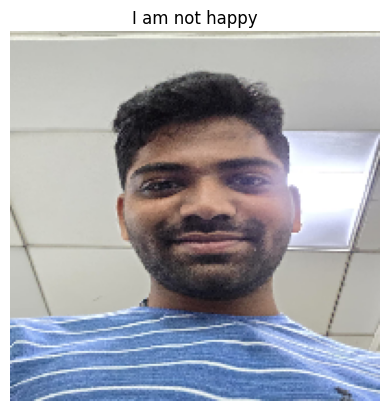

3.jpeg: I am not happy


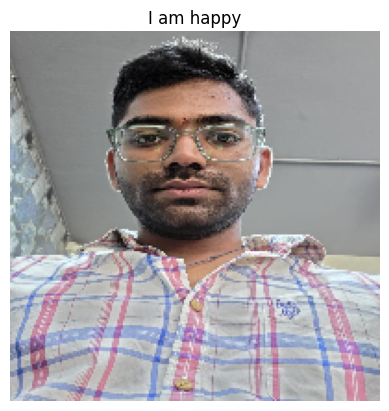

4.jpeg: I am happy


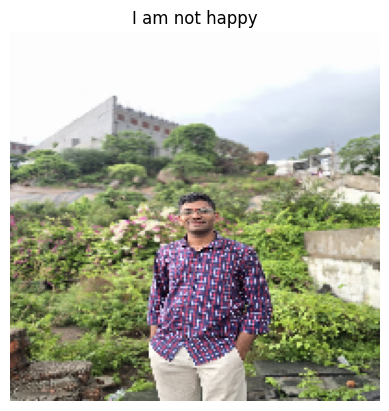

5.jpeg: I am not happy


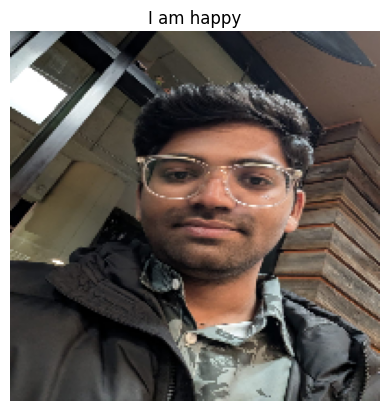

6.jpeg: I am happy


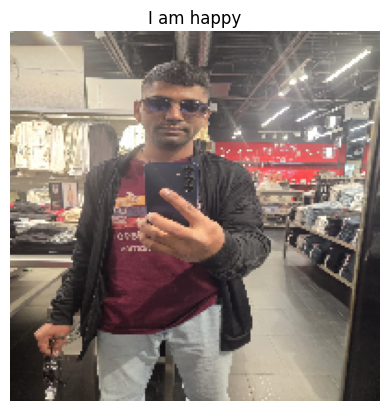

7.jpeg: I am happy


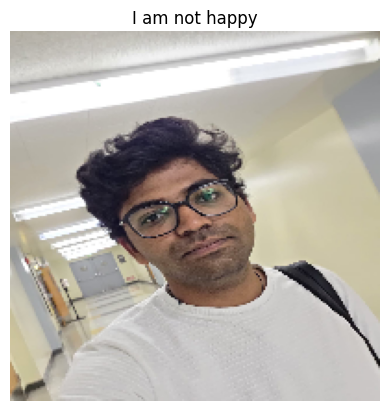

8.jpeg: I am not happy


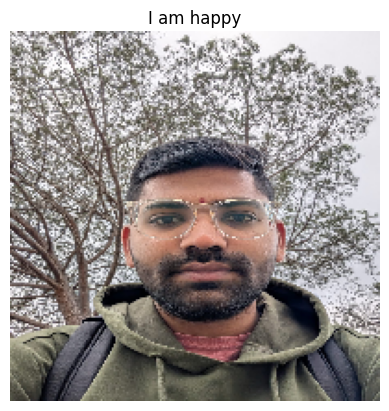

9.jpeg: I am happy


In [52]:

import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array

test_path = "/Users/sainandaviharim/Downloads/CNN/testing"
target_size = (200, 200)
valid_exts = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"}

for fname in sorted(os.listdir(test_path)):
    fpath = Path(test_path) / fname
    if not fpath.is_file() or fpath.suffix.lower() not in valid_exts:
        continue

    try:
        img = load_img(str(fpath), target_size=target_size)
    except Exception as e:
        print(f"Skip {fname}: {e}")
        continue

    x = img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)

    pred = model.predict(x, verbose=0)

    if pred.shape[-1] == 1:  # sigmoid
        mood = "I am happy" if pred[0,0] < 0.5 else "I am not happy"
    else:  # softmax
        mood = "I am happy" if np.argmax(pred) == 0 else "I am not happy"

    plt.imshow(img)
    plt.axis('off')
    plt.title(mood)
    plt.show()

    print(f"{fname}: {mood}")
